# <h4 align=center> **Victoria RISO** </h4>

# <h4 align=center> **PROYECTO INDIVIDUAL Nº1 - Machine Learning Operations (MLOps)** </h4>

# <h4 align=center>**`Exploratory Data Analysis-EDA`**</h4>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS

Comienzo por el dataset movies

In [2]:
# leo los datos movies_ds_transform.csv
# es el dataset con los datos limpios (espero) que preparé en la notebook de transformaciones
df = pd.read_csv('movies_ds_transform.csv')

In [3]:
# veo nombre de las columnas, tipo de datos y cantidad de valores no nulos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  float64
 2   genres                 45376 non-null  object 
 3   id                     45376 non-null  int64  
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  float64
 7   production_companies   45376 non-null  object 
 8   production_countries   45376 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45376 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

Algunos chequeos de tipos de datos, nulos y faltantes los realicé en la notebook de transformaciones

#### BUSQUEDA Y ELIMINACION DE DUPLICADOS

In [4]:
# Hay 45376 peliculas
# reviso si hay peliculas duplicadas (por el id)
  # ids = df["ID"]
  # df[ids.isin(ids[ids.duplicated()])].sort_values("ID")
df_dup = df[df['id'].isin(df['id'][df['id'].duplicated()])].sort_values('id')

In [5]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 5861 to 39980
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  6 non-null      object 
 1   budget                 59 non-null     float64
 2   genres                 59 non-null     object 
 3   id                     59 non-null     int64  
 4   original_language      59 non-null     object 
 5   overview               59 non-null     object 
 6   popularity             59 non-null     float64
 7   production_companies   59 non-null     object 
 8   production_countries   59 non-null     object 
 9   release_date           59 non-null     object 
 10  revenue                59 non-null     float64
 11  runtime                59 non-null     float64
 12  spoken_languages       59 non-null     object 
 13  status                 59 non-null     object 
 14  tagline                21 non-null     object 
 15  title  

In [6]:
# elimino las pelis duplicadas
# Tendre que revisar lo mismo en credits, borrar y volver a guardar los datos de actores y directores. uf! neverending story

df_sindup = df.drop_duplicates(subset='id', keep="last")

In [7]:
# quedaron 45346    # 45376 - 45346 = 30 peliculas duplicadas
df_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45375
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45346 non-null  float64
 2   genres                 45346 non-null  object 
 3   id                     45346 non-null  int64  
 4   original_language      45335 non-null  object 
 5   overview               44405 non-null  object 
 6   popularity             45346 non-null  float64
 7   production_companies   45346 non-null  object 
 8   production_countries   45346 non-null  object 
 9   release_date           45346 non-null  object 
 10  revenue                45346 non-null  float64
 11  runtime                45100 non-null  float64
 12  spoken_languages       45346 non-null  object 
 13  status                 45266 non-null  object 
 14  tagline                20387 non-null  object 
 15  title  

In [8]:
# reviso el dataset de credits crudo (el original)
# también podría tener duplicados
dfc = pd.read_csv('credits.csv')

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [10]:
# Hay duplicados tambien. Porque tiene la misma cantidad que el dataset de movies original
dfc[dfc['id'].isin(dfc['id'][dfc['id'].duplicated()])].sort_values('id')

,cast,crew,id
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
...,...,...,...
25954,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
45275,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
33196,"[{'cast_id': 1, 'character': 'Jenjira', 'credi...","[{'credit_id': '5448c8efc3a3680fb4001582', 'de...",298721


En credits hay 87 filas duplicadas. </br>
Espero que algunos estén repetidos mas de una vez. O tendré que ver si algunos credits no tienen su correspondiente fila en movies

In [11]:
# elimino los duplicados del dataset
dfc_sindup = dfc.drop_duplicates(subset='id', keep="last")

In [12]:
dfc_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45432 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45432 non-null  object
 1   crew    45432 non-null  object
 2   id      45432 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


Quedaron 45346 películas y 45432 filas de credits </br>
Hay 86 filas de credits sin su correspondiente película. </br> 

In [13]:
# hago un inner join para quedarme con las pelis que tienen creditos (podria haber tambien peliculas sin creditos. Uf, uf, re Uf!)
# y despues las separo otra vez
df_merge = pd.merge(df_sindup, dfc_sindup, how='inner', on='id')

In [14]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4485 non-null   object 
 1   budget                 45345 non-null  float64
 2   genres                 45345 non-null  object 
 3   id                     45345 non-null  int64  
 4   original_language      45334 non-null  object 
 5   overview               44404 non-null  object 
 6   popularity             45345 non-null  float64
 7   production_companies   45345 non-null  object 
 8   production_countries   45345 non-null  object 
 9   release_date           45345 non-null  object 
 10  revenue                45345 non-null  float64
 11  runtime                45099 non-null  float64
 12  spoken_languages       45345 non-null  object 
 13  status                 45265 non-null  object 
 14  tagline                20387 non-null  object 
 15  ti

##### REVISO SI HAY OUTLIERS EN LAS COLUMNAS QUE USARE EN LAS FUNCIONES

¿Hay Outliers en revenue, budget o return?

<Axes: xlabel='revenue'>

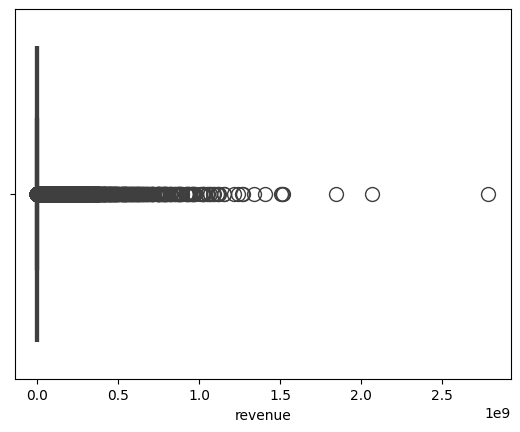

In [16]:
sns.boxplot(x = 'revenue', data = df_merge,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [17]:
# revisar las películas con revenue > a 1.5 algo
df_merge[['title', 'revenue', 'budget','return']].sort_values(['revenue'], ascending=False).head(6)

,title,revenue,budget,return
14522,Avatar,2.787965e+09,237000000.0,11.763566
26496,Star Wars: The Force Awakens,2.068224e+09,245000000.0,8.441729
1634,Titanic,1.845034e+09,200000000.0,9.225171
17781,The Avengers,1.519558e+09,220000000.0,6.907081
25025,Jurassic World,1.513529e+09,150000000.0,10.090192
28770,Furious 7,1.506249e+09,190000000.0,7.927628


Son todas películas muy taquilleras que tuvieron mucho presupuesto y mucha recaudación. No corrijo los outliers de revenue 

In [18]:
# pareciera que hay revenue negativo (es posible que suceda)
# igual reviso
df_merge[['title', 'revenue', 'budget','return']].sort_values(['revenue'], ascending=True).head(5)

,title,revenue,budget,return
45332,Deep Hearts,0.0,0.0,0.0
41941,Silk,0.0,0.0,0.0
41940,Equalizer 2000,0.0,0.0,0.0
41939,The Sisterhood,0.0,0.0,0.0
41938,Eddie Griffin: You Can Tell 'Em I Said It,0.0,0.0,0.0


In [19]:
# Averiguo cuántas películas tienen revenue y budget en 0

df_merge[(df_merge['revenue']==0) & (df_merge['budget']==0)].shape[0]

34447

In [20]:
34447/45345 # casi el 76% de las peliculas tienen revenue y budget en 0

0.7596647921490792

In [21]:
# veo si el resto de los valores tambien carecen de datos útiles
# de acuerdo a eso decidiré si mantenerlas o eliminarlas
df_merge.loc[(df_merge['revenue']==0) & (df_merge['budget']==0), ['title','vote_average','vote_count','popularity']]

,title,vote_average,vote_count,popularity
2,Grumpier Old Men,6.5,92.0,11.712900
7,Tom and Huck,5.4,45.0,2.561161
11,Dracula: Dead and Loving It,5.7,210.0,5.430331
21,Copycat,6.5,199.0,10.701801
23,Powder,6.3,143.0,12.133094
...,...,...,...,...
45340,Robin Hood,5.7,26.0,5.683753
45341,Century of Birthing,9.0,3.0,0.178241
45342,Betrayal,3.8,6.0,0.903007
45343,Satan Triumphant,0.0,0.0,0.003503


Aunque revenue, budget, vote_avg y vote_count estan en 0 Tienen titulo y valores en popularity. Mantengo esas filas

In [22]:
# reviso las peliculas sort por budget 
df_merge[['title', 'revenue', 'budget','return']].sort_values(['budget'], ascending=False).head(10)

,title,revenue,budget,return
17090,Pirates of the Caribbean: On Stranger Tides,1.045714e+09,380000000.0,2.751878
11806,Pirates of the Caribbean: At World's End,9.610000e+08,300000000.0,3.203333
26499,Avengers: Age of Ultron,1.405404e+09,280000000.0,5.019299
11048,Superman Returns,3.910812e+08,270000000.0,1.448449
18645,John Carter,2.841391e+08,260000000.0,1.092843
16099,Tangled,5.917949e+08,260000000.0,2.276134
44728,Transformers: The Last Knight,6.049421e+08,260000000.0,2.326701
11759,Spider-Man 3,8.908716e+08,258000000.0,3.452991
21124,The Lone Ranger,8.928991e+07,255000000.0,0.350157
13867,Harry Potter and the Half-Blood Prince,9.339592e+08,250000000.0,3.735837


Hay varias peliculas con budgets mayor a u$ 250.000.000 que es muchísimo dinero. Pero considerando el return que tuvieron deben ser valores correctos

In [23]:
# reviso las peliculas sort por return
df_merge[['title', 'revenue', 'budget','return']].sort_values(['return'], ascending=False).head(10)

,title,revenue,budget,return
328,Tommy Boy,32648673.0,0.0,inf
23157,American Cyborg: Steel Warrior,447784.0,0.0,inf
23153,Cold in July,427418.0,0.0,inf
2231,Mona Lisa,5794184.0,0.0,inf
4,Father of the Bride Part II,76578911.0,0.0,inf
2628,The Morning After,25147055.0,0.0,inf
5862,National Security,50097949.0,0.0,inf
23108,We Are the Best!,180590.0,0.0,inf
2630,From the Hip,9518342.0,0.0,inf
2232,Heart Condition,4100000.0,0.0,inf


In [24]:
# corrijo los valores infinito y vuelvo a revisar
# son infinito los que tienen budget 0, porque es el divisor
df_merge.loc[df_merge['budget'] == 0, 'return'] = 0

# y reviso otra vez
df_merge[['title', 'revenue', 'budget','return']].sort_values(['return'], ascending=False).head(10)

,title,revenue,budget,return
3992,Less Than Zero,12396383.0,1.0,1.239638e+07
3336,Modern Times,8500000.0,1.0,8.500000e+06
14343,Welcome to Dongmakgol,33579813.0,8.0,4.197477e+06
22224,Aquí Entre Nos,2755584.0,1.0,2.755584e+06
2303,"The Karate Kid, Part II",115103979.0,113.0,1.018619e+06
25930,Nurse 3-D,10000000.0,10.0,1.000000e+06
16632,From Prada to Nada,2500000.0,93.0,2.688172e+04
14163,Paranormal Activity,193355800.0,15000.0,1.289039e+04
8194,Tarnation,1162014.0,218.0,5.330339e+03
2589,The Blair Witch Project,248000000.0,60000.0,4.133333e+03


Hay errores en los datos de budget. Qué hago? elimino? Porque si el return es 0 esta claro que es un error. Pero un revenue tan alto podria inducir a confusion, creo

<Axes: xlabel='budget'>

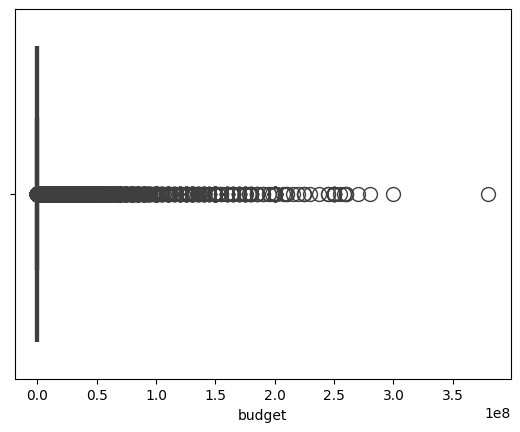

In [ ]:
# hay errores en los datos de budget. Grafco para tener mas informacion
sns.boxplot(x = 'budget', data = df_merge,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [26]:
# reviso las películas sort ascending por budget

df_merge.loc[df_merge['budget'] > 0,['title', 'revenue', 'budget','return']].sort_values(['budget'], ascending=True).head(10)

,title,revenue,budget,return
19218,"Love, Wedding, Marriage",1378.0,1.0,1378.0
22224,Aquí Entre Nos,2755584.0,1.0,2755584.0
35011,The Letters,1.0,1.0,1.0
3992,Less Than Zero,12396383.0,1.0,12396383.0
35504,Secret Society of Souptown,0.0,1.0,0.0
41684,The Ugly Duckling,0.0,1.0,0.0
15842,Tere Naam,2.0,1.0,2.0
16576,Speed & Angels,0.0,1.0,0.0
19863,We Should Not Exist,0.0,1.0,0.0
2187,Slam,0.0,1.0,0.0


Hay errores en todas las columnas. </br>
Si esto fuera un trabajo real consultaría con el proveedor de los datos para saber qué quiere hacer y para que mejore la calidad de los mismos.</br>
Esto es un proyecto individual para mostrar cuánto aprendí, si elimino me quedaré sin valores para trabajar.

REVISO LA RELACION ENTRE REVENUE Y BUDGET

<Axes: xlabel='budget', ylabel='revenue'>

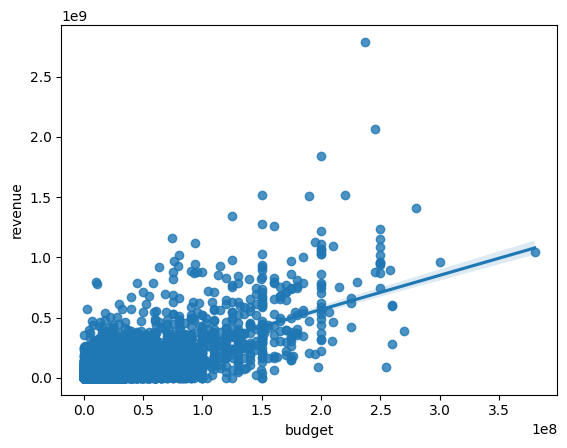

In [27]:
# Auqneu se que hay muchos errores reviso la relacion entre revenue y budget
sns.regplot(x = "budget", y = "revenue", data = df_merge)

VEO CANTIDAD DE PELICULAS ESTRENADAS POR AÑO QUE HAY EN EL DATASET

<Axes: xlabel='release_year', ylabel='Count'>

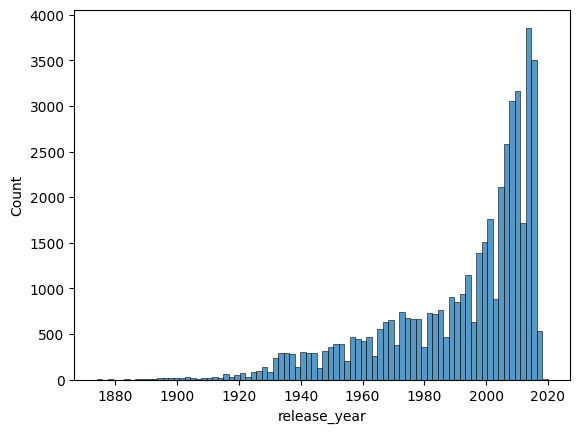

In [28]:
# veo la cantidad de peliculas por año de estreno. ¿Habrá alguna tendencia?
sns.histplot(x = "release_year", data = df_merge)

In [29]:
df_merge[df_merge['release_year'] > 2010].groupby(['release_year'])['release_year'].count()

release_year
2011    1666
2012    1721
2013    1887
2014    1973
2015    1904
2016    1604
2017     531
2018       5
2020       1
Name: release_year, dtype: int64

Hay un aumento de la cantidad de películas estrenadas cada año. El dataset estaría completo hasta 2015.

VEO LA CANTIDAD DE PELICULAS POR AÑO AGRUPADAS POR IDIOMA

In [30]:
# Parece que hay demasiados idiomas para hacer un gráfico asi
df_merge['original_language'].value_counts()

original_language
en    32184
fr     2435
it     1528
ja     1346
de     1077
      ...  
uz        1
mt        1
hy        1
lb        1
si        1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='release_year', ylabel='Count'>

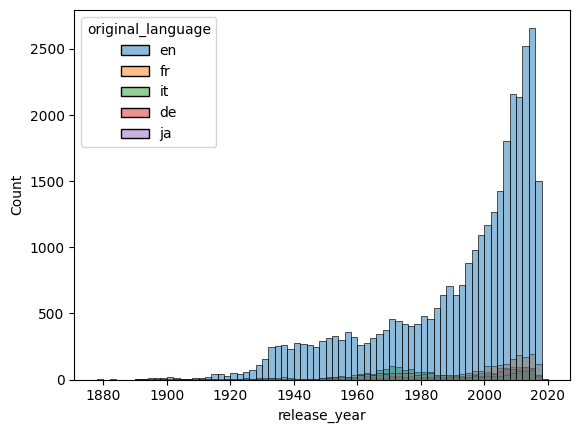

In [31]:
# Hay peliculas en 89 idiomas distintos. Algunos con solo 1 pelicula.
# reviso los 5 idiomas con mas peliculas: 'en', 'fr', 'it', 'ja', 'de'

  # Pruebo con eso
  # active_statuses = ['active', 'trial']
  # mask = df['Subscription'].isin(active_statuses)
  # active_customers = df[mask]

sns.histplot(x = 'release_year', hue = "original_language", data = df_merge[df_merge['original_language'].isin(['en', 'fr', 'it', 'ja', 'de'])])

<Axes: xlabel='release_year', ylabel='Count'>

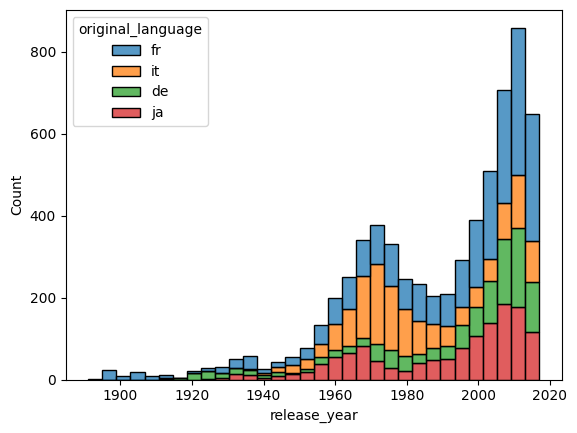

In [32]:
# Ya sabia qeu la mayoría de las peliculas tenian idioma inglés
# veo el resto
sns.histplot(x = 'release_year', hue = "original_language", multiple = "stack", data = df_merge[df_merge['original_language'].isin(['fr', 'it', 'ja', 'de'])])

Hay películas con idioma original italiano entre 1960 y 1980. Y más peliculas francesas en los últimos años. </br>
Me sorprende la cantidad de películas japonesas y en idioma alemán (sigla 'de')

#### NUBE DE PALABRAS CON LOS TITULOS

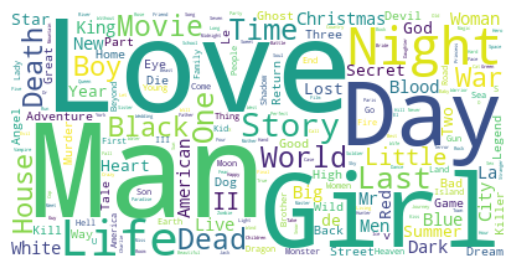

In [34]:
#Creating the text variable

text2 = " ".join(title for title in df_merge['title'])

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Love y Man son las dos palabras más usadas en los títulos, seguidas por Girl y Day. </br>
Luego estarían Life, Night, Story. Y por último One, Last, Time y Dead, si consideramos solo las más destacadas

In [35]:
# Vuelvo a separar los datasets para conservar los cambios luego del merge

# guardo las columnas de movies que necesitare para las funciones

movies_aftermerge = df_merge[['id', 'title', 'release_year', 'popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'return']]
movies_aftermerge.to_csv("movies_sin_duplic.csv" , index=False)

# separo credits para volver a hacer las transformaciones necesarias

credits_aftermerge = df_merge[['id', 'cast', 'crew']]
credits_aftermerge.to_csv("credits_sin_duplic.csv" , index=False)

Realizado:</br>
Se identificaron y eliminaron los duplicados en ambos datasets</br>
Se investigaron las columnas 'budget', 'revenue' y 'return' buscando outliers o datos erróneos. </br>
Se investigó la cantidad de películas estrenadas por año y por los principales idiomas originales </br>
Se realizó una nube de palabras con los títulos de las películas identificando las palabras mas utilizadas.

Falta hacer:</br>
Analizar las correlaciones entre vote_average, vote_count y popularity </br>
Analizar la frecuencia de los géneros </br>
Investigar las columnas del dataset de credits, especialmente lo relacionado a actores y directores que son los que usaré en las funciones 